## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

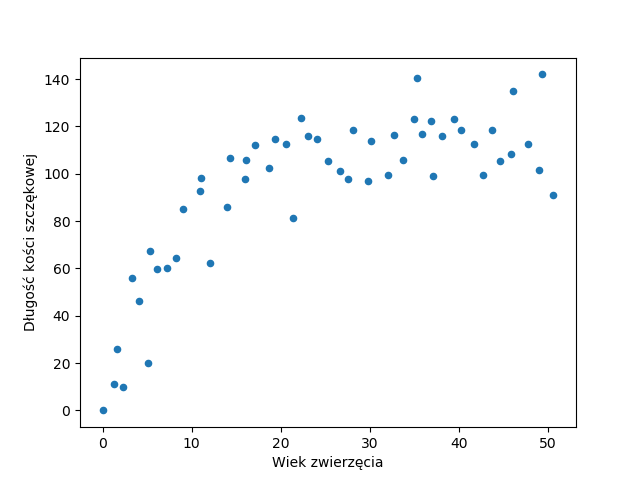

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import time
from typing import Tuple

In [29]:
'''
input:
x - wartość zmiennej niezależnej
n - stopień wielomianu

output:
out: [] - lista o długości n z kolejnymi potęgami wejściowej cechy x
'''
def transform_to_polynomial_feature(x: np.ndarray, n: int) -> np.ndarray:
    out = np.column_stack([x**i for i in range(1, n+1)])
    return out


### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

Załadowanie danych z pliku csv

In [30]:
df = pd.read_csv('jaws.csv')
# print(df.head)

X = df['age'].values
y = df['bone'].values

print("Min X:", np.min(X), "Max X:", np.max(X))
print("Min y:", np.min(y), "Max y:", np.max(y))


Min X: 0.0 Max X: 50.60409652
Min y: 0.0 Max y: 142.0


Funkcje normalizująca i przywracająca

In [31]:
def normalize(data: np.array) -> np.array:
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data, data_min, data_max

def denormalize(normalize_data: np.array, data_min: float, data_max: float) -> np.array:
    original_data = normalize_data * (data_max - data_min) + data_min
    return original_data

Zmieniony kod z poprzedniego projektu z regresji liniowej

In [32]:
def calculate_polynomial_regression_function(X: np.array, beta: np.array) -> np.array:
    predict = np.dot(X, beta)
    return predict


def initialize_coefficients(n:int) -> Tuple[np.ndarray, float]:
    beta = np.random.uniform(0, 1, n) 
    alpha = 0.19   
    return beta, alpha

def calculate_error(predictions: np.array, y: np.array) -> float:
    diff = predictions - y
    error = np.sum(diff ** 2)
    return error


def calculate_gradient(predictions: np.ndarray, y: np.ndarray, X: np.ndarray) -> np.ndarray:
    m = len(y)
    return (1/m) * np.dot(X.T, (predictions - y))


def update_regression_coefficients(beta: np.ndarray, grad_beta: np.ndarray, alpha: float) -> np.ndarray:
    return beta - alpha * grad_beta

In [33]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
beta_history: [] - lista z współczynnikami beta w każdej z epok
error_history: [] - lista z błędem w każdej epoce
'''

def learn_and_fit(X: np.ndarray, y: np.ndarray, n: int) -> Tuple[np.ndarray, np.ndarray]:
    beta, alpha = initialize_coefficients(n)
    
    beta_history = []
    error_history = []
    for epoch in range(250):
        predictions = calculate_polynomial_regression_function(X, beta)

        error = calculate_error(predictions, y)
        error_history.append(error)

        if epoch > 0 and np.abs(error_history[-1] - error_history[-2]) < 1e-6:
            break  

        grad_beta = calculate_gradient(predictions, y, X)
        beta = update_regression_coefficients(beta, grad_beta, alpha)

        beta_history.append(beta.copy())
        
    return np.array(beta_history), error_history


In [34]:
X_normalized, X_min, X_max = normalize(X)
y_normalized, y_min, y_max = normalize(y)

n = 5

X_poly = transform_to_polynomial_feature(X_normalized, n)

beta_history_normalized, error_history_normalized = learn_and_fit(X_poly, y_normalized, n)


predictions_normalized = calculate_polynomial_regression_function(X_poly, beta_history_normalized[-1])
predictions = denormalize(predictions_normalized, y_min, y_max)




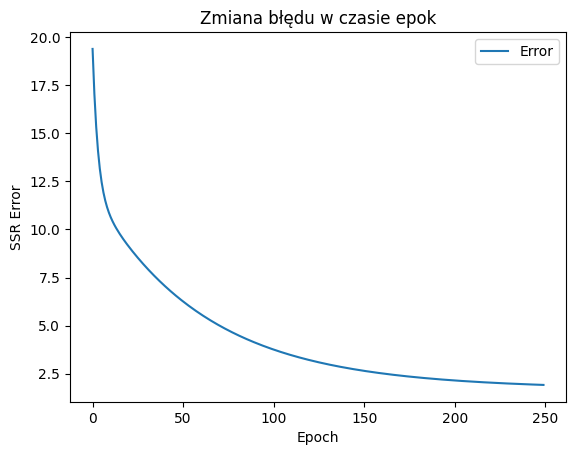

In [35]:
plt.plot(range(len(error_history_normalized)), error_history_normalized, label='Error')
plt.xlabel('Epoch')
plt.ylabel('SSR Error')
plt.title('Zmiana błędu w czasie epok')
plt.legend()
plt.show()

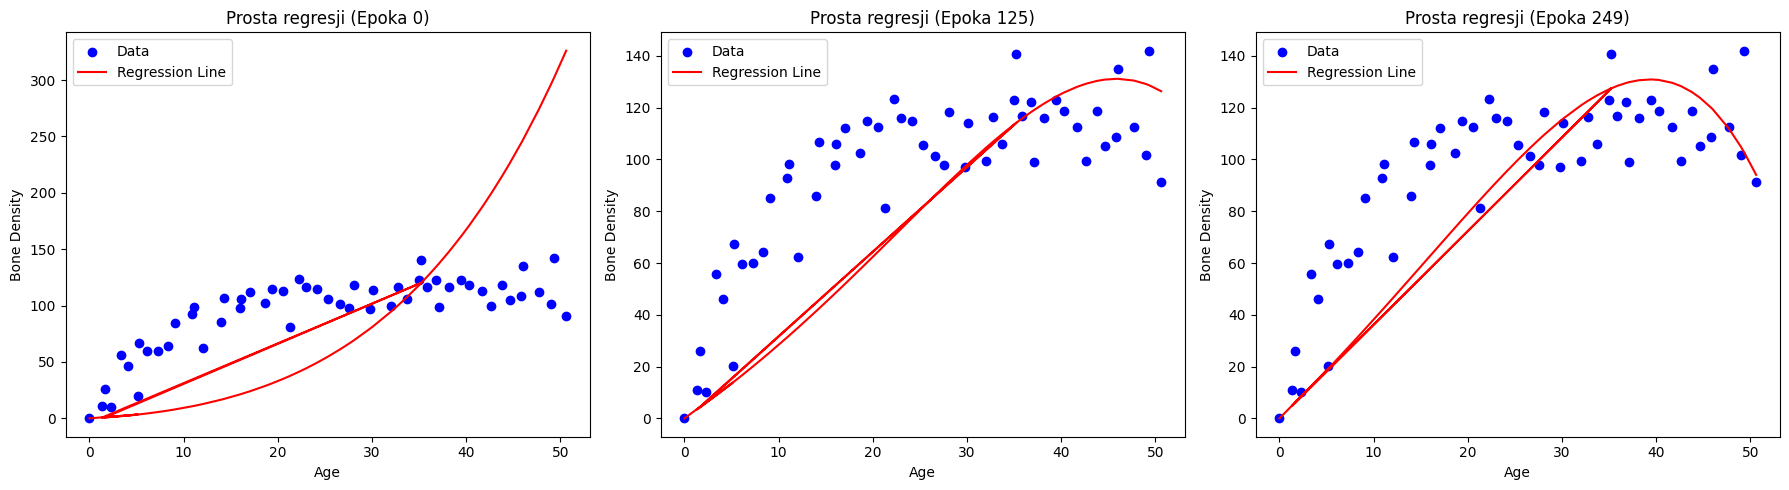

In [36]:
def plot_regression_line(ax, x: np.ndarray, y: np.ndarray, beta: np.ndarray, epoch: int):
    ax.scatter(x, y, color='blue', label='Data')  

    X_poly = transform_to_polynomial_feature(normalize(x)[0], len(beta))
    predictions = calculate_polynomial_regression_function(X_poly, beta)  
    predictions = denormalize(predictions, y_min, y_max)  

    ax.plot(x, predictions, color='red', label='Regression Line') 
    ax.set_title(f'Prosta regresji (Epoka {epoch})')
    ax.set_xlabel('Age')
    ax.set_ylabel('Bone Density')
    ax.legend()


first_epoch = 0
middle_epoch = len(beta_history_normalized) // 2
last_epoch = len(beta_history_normalized) - 1

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_regression_line(axs[0], X, y, beta_history_normalized[first_epoch], epoch=first_epoch)
plot_regression_line(axs[1], X, y, beta_history_normalized[middle_epoch], epoch=middle_epoch)
plot_regression_line(axs[2], X, y, beta_history_normalized[last_epoch], epoch=last_epoch)

plt.tight_layout()
plt.show()



### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [37]:
start_time = time.time()

X_poly_original = transform_to_polynomial_feature(X, n)

beta_history_original, error_history_original = learn_and_fit(X_poly_original, y, n)

predictions_original = calculate_polynomial_regression_function(X_poly_original, beta_history_original[-1])
end_time = time.time()
print(f"Czas działąnia dla danych nienormalizowanych: {end_time - start_time:.4f} sekund")

start_time = time.time()
X_poly_normalized = transform_to_polynomial_feature(X_normalized, n)

beta_history_normalized, error_history_normalized = learn_and_fit(X_poly_normalized, y_normalized, n)

predictions_normalized = calculate_polynomial_regression_function(X_poly_normalized, beta_history_normalized[-1])
predictions = denormalize(predictions_normalized, y_min, y_max)

end_time = time.time()
print(f"Czas działąnia dla danych znormalizowanych: {end_time - start_time:.4f} sekund")

print("Przewidywane wartości dla danych oryginanlnych:", predictions_original[:5])
print("Przewidywane wartośći dla danych znormalizowanych:", predictions[:5])

Czas działąnia dla danych nienormalizowanych: 0.0071 sekund
Czas działąnia dla danych znormalizowanych: 0.0060 sekund
Przewidywane wartości dla danych oryginanlnych: [nan nan nan nan nan]
Przewidywane wartośći dla danych znormalizowanych: [  0.          20.30086458   5.19454865 124.49266536   6.43101353]


C:\Users\barte\AppData\Local\Temp\ipykernel_9352\2228887243.py:13: RuntimeWarning: overflow encountered in square
  error = np.sum(diff ** 2)
C:\Users\barte\AppData\Local\Temp\ipykernel_9352\2471905520.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  if epoch > 0 and np.abs(error_history[-1] - error_history[-2]) < 1e-6:


### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

Predictions for degree 1: [  0.          16.39435063   4.23328303 113.01582868   5.23686337
   7.36859065  10.65416289  12.9685803   16.88829275  19.48291669
  23.20714548  26.58953018  28.99442488  34.89582421  35.59403792
  38.78264999  44.89260963  45.89565962  51.16634576  51.55632984
  54.7206336   59.74575453  61.99481692  65.8924581   68.40414885
  71.40265143  73.85404573  77.35004839  81.18557608  85.34868763
  88.43093276  90.2154145   95.41317047  96.6062348  102.58125313
 104.89339573 108.16235757 112.22382126 115.07517345 118.1134374
 119.03829534 122.35947694 126.48418354 129.08900978 133.71319487
 136.77705569 140.35460166 143.08407257 147.05950822 147.57267092
 152.97595439 157.03026219 158.2014968  162.28898703]
Predictions for degree 4: [  0.          21.47580322   5.48518559 124.99413821   6.79256337
   9.57784684  13.89099684  16.94239456  22.13086906  25.57666794
  30.53325529  35.04027474  38.2445923   46.09136309  47.01699755
  51.23308306  59.24212014  60.545627

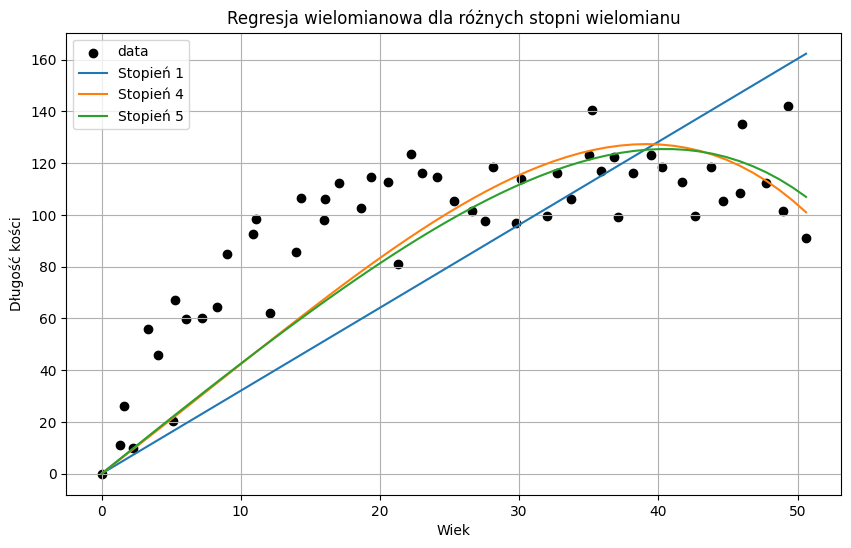

In [38]:
n_values = [1, 4, 5]
X_poly_dict = {n: transform_to_polynomial_feature(X_normalized, n) for n in n_values}

beta_dict = {n: learn_and_fit(X_poly, y_normalized, n)[0][-1] for n, X_poly in X_poly_dict.items()}

predictions_dict = {n: np.dot(X_poly_dict[n], beta_dict[n]) for n in n_values}

predictions_denormalized_dict = {n: denormalize(predictions_dict[n], y_min, y_max) for n in n_values}

for n in n_values:
    print(f"Predictions for degree {n}: {predictions_denormalized_dict[n]}")

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='black', label='data')

x_range = np.linspace(np.min(X), np.max(X), 54)

x_range_normalized, _, _ = normalize(x_range)

for n in n_values:
    X_poly_range = transform_to_polynomial_feature(x_range_normalized, n)
    
    predictions_range = np.dot(X_poly_range, beta_dict[n])
    
    predictions_denormalized_range = denormalize(predictions_range, y_min, y_max)
    
    
    plt.plot(x_range, predictions_denormalized_range, label=f"Stopień {n}")

plt.title('Regresja wielomianowa dla różnych stopni wielomianu')
plt.xlabel('Wiek')
plt.ylabel('Długość kości')
plt.legend()
plt.grid(True)
plt.show()


### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

Link do zbioru danych https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression


In [39]:
df = pd.read_csv('Ice_cream selling data.csv')
df.columns = df.columns.str.replace(r' \([^)]+\)', '', regex=True) 
# print(df.columns)
# print(df.head)

Index(['Temperature', 'Ice Cream Sales'], dtype='object')


In [40]:
X = df['Temperature']
y = df['Ice Cream Sales']

X_normalized, X_min, X_max = normalize(X)
y_normalized, y_min, y_max = normalize(y)
n = 5

X_poly = transform_to_polynomial_feature(X_normalized, n)

beta_history_normalized, error_history_normaluzed = learn_and_fit(X_poly, y_normalized, n)

print("Wynikowy wektor beta:", beta_history_normalized[-1])

predictions_normalized = calculate_polynomial_regression_function(X_poly, beta_history_normalized[-1])

predictions = denormalize(predictions_normalized, y_min, y_max)

print("Prognozy:", predictions[:5])

Wynikowy wektor beta: [ 0.32672503 -0.40244571  0.37346135  0.23820734  0.39538751]
Prognozy: [0.32862552 0.79795419 0.92948252 1.25348928 1.67587041]


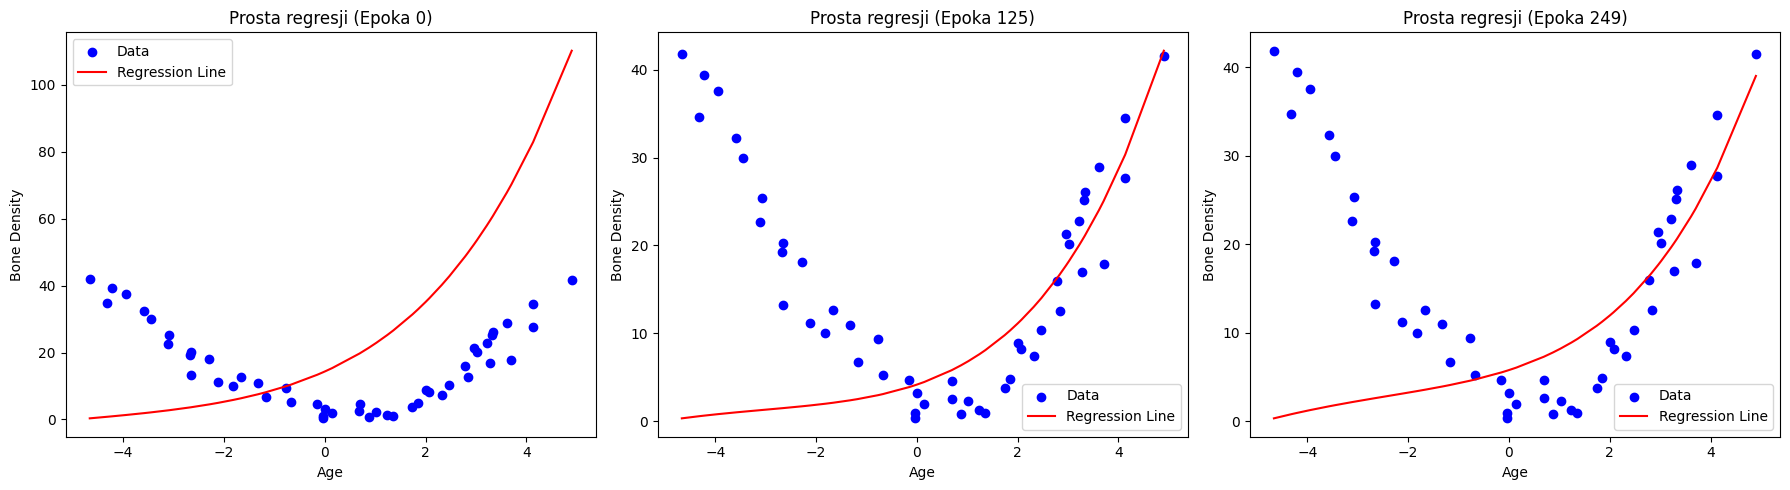

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_regression_line(axs[0], X, y, beta_history_normalized[first_epoch], epoch=first_epoch)
plot_regression_line(axs[1], X, y, beta_history_normalized[middle_epoch], epoch=middle_epoch)
plot_regression_line(axs[2], X, y, beta_history_normalized[last_epoch], epoch=last_epoch)

plt.tight_layout()
plt.show()

### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Mean Squared Error (MSE) – średni błąd kwadratowy
MSE mierzy średnią różnicę między rzeczywistymi wartościami a wartościami przewidywanymi przez model, podniesioną do kwadratu. Kwadrat różnicy penalizuje większe błędy bardziej niż mniejsze, co pomaga zidentyfikować znaczące odchylenia w predykcjach.
\begin{equation}
MSE = (1/n) * Σ(y_i - ŷ_i)^2
\end{equation}
Gdzie:

$y_i$ to rzeczywista wartość,

$ŷ_i$ to przewidywana wartość,

$n$ to liczba próbek.

In [42]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / n
    return mse



mse = mean_squared_error(y,predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 209.5032059671152
